In [16]:
%matplotlib inline
from matplotlib import pyplot as plt

import seaborn as sns

In [17]:
import numpy as np
import h5py
from corner import corner
#from getdist import plots, MCSamples
#import getdist

In [18]:
test_path = '/home/users/swmclau2/scratch/uatu_preds/deep_resnet_smooth_1.0_noise_0.3_10.hdf5'

In [19]:
outputs = np.zeros((50, 2, 36**2))
truths = np.zeros((50, 2))

In [20]:
with h5py.File(test_path, 'r') as f:
    for i, key in enumerate(f):
        #print i,
        split_key = key.split('_')
        truths[i] = float(split_key[1]), float(split_key[3])
        #print len(f[key].keys())
        for j, m in enumerate(f[key].keys()):
            outputs[i,:,j] = f[key][m][()]


In [21]:
mean_preds = outputs.mean(axis=2)
std_preds = outputs.std(axis=2)

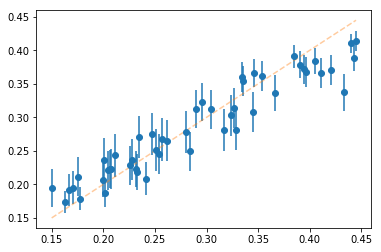

In [22]:
plt.errorbar(truths[:,0], mean_preds[:,0], yerr = std_preds[:,0], fmt='o')
plt.plot(truths[:,0], truths[:,0], ls = '--', alpha = 0.4)

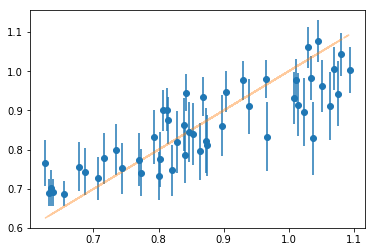

In [23]:
plt.errorbar(truths[:,1], mean_preds[:,1], yerr = std_preds[:,1], fmt='o')
plt.plot(truths[:,1], truths[:,1], ls = '--', alpha = 0.4)

In [24]:
center_point = truths.mean(axis = 0)

In [25]:
closest_to_center_idx = np.argmin(np.sum((truths - center_point)**2, axis=1))

In [26]:
print closest_to_center_idx, truths[closest_to_center_idx]

24 [ 0.279925  0.846988]


In [27]:
names = [r'$\Omega_m$', r'$\sigma_8$']

In [28]:
samples = MCSamples(samples=outputs[i].T,names = names)

Removed no burn in


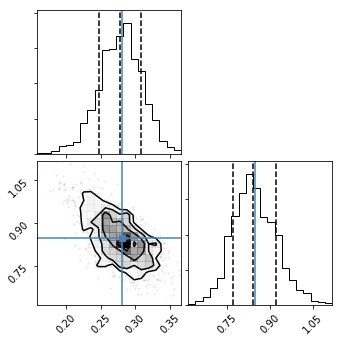

In [29]:
i = closest_to_center_idx
corner(outputs[i].T, truths = truths[i].T, quantiles=[0.16, 0.5, 0.84],);
plt.show()